<a href="https://colab.research.google.com/github/kadekadhi120/Scientific-Computing/blob/main/Sesi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

<ipython-input-25-6b6b9e931396>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [ ]:
x = [0, 1, 2, 3, 4, 5]
y = [1, 3, 3, 5, 2, 2]

In [ ]:
f = interp1d(x, y)

x_lin = np.linspace(0, 5, 100)
y_lin = f(x_lin)

y_ask = f(3.1)
print(y_ask)

4.699999999999999


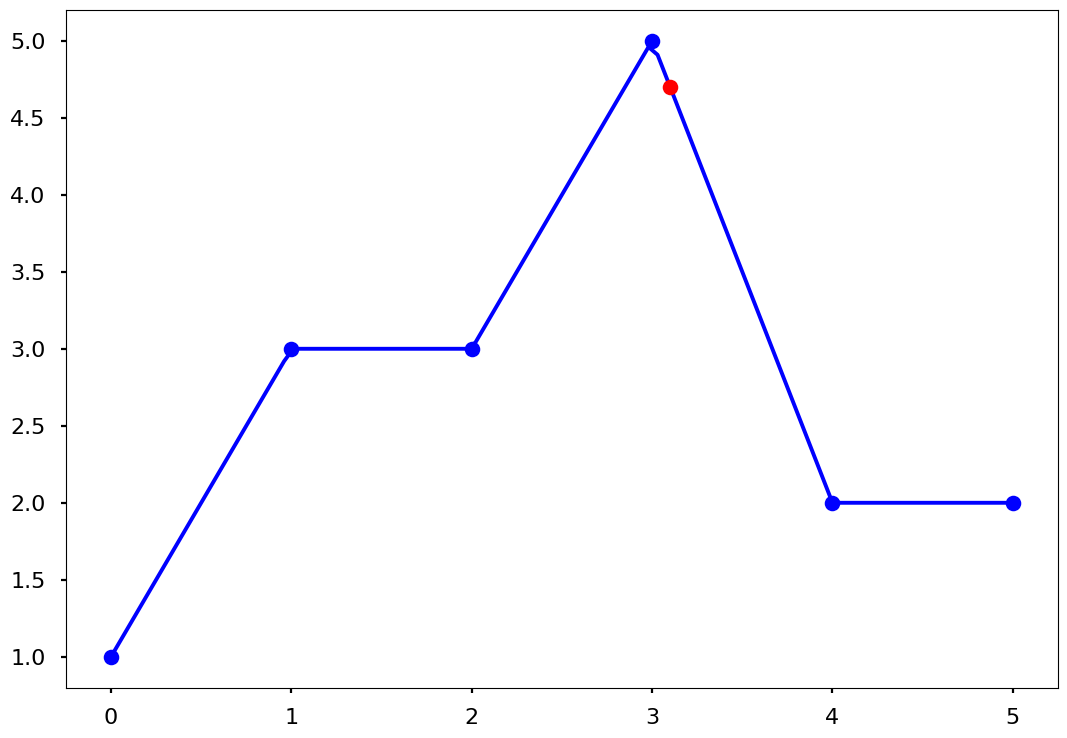

In [ ]:
plt.plot(x,y,'ob')
plt.plot(x_lin, y_lin, 'b')
plt.plot(3.1,f(3.1), 'ro')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline
def divided_diff(x,y):
  '''
  function to calculate the divided 
  different table
  '''
  n = len(y)
  ceof = np.zeros([n,n])
  #the frist colom is y
  ceof[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      ceof[i][j] = \
     (ceof[i+1][j-1] - ceof[i][j-1] ) / (x[i+j]-x[i])

  return ceof    

def newton_poly(ceof, x_data, x):
  '''
  evaluate the newton polynomil
  at x
  '''
  n = len(x_data) - 1
  p = ceof[n]
  for k in range(1,n+1):
    p = ceof[n-k] + (x -x_data[n-k])*p

  return p

<ipython-input-48-5d6d2c041da9>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


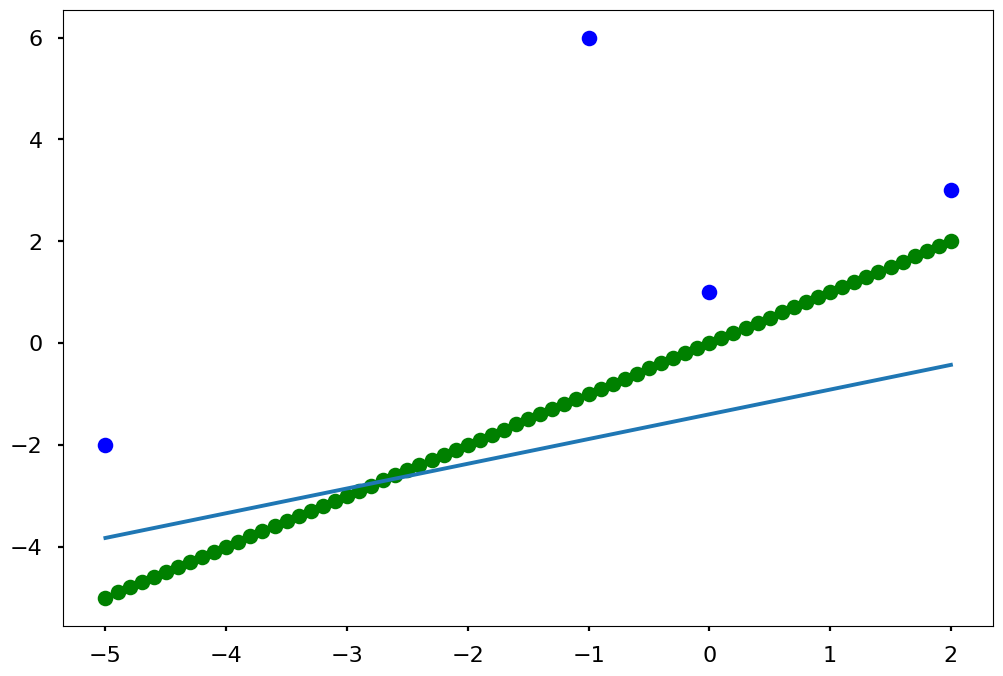

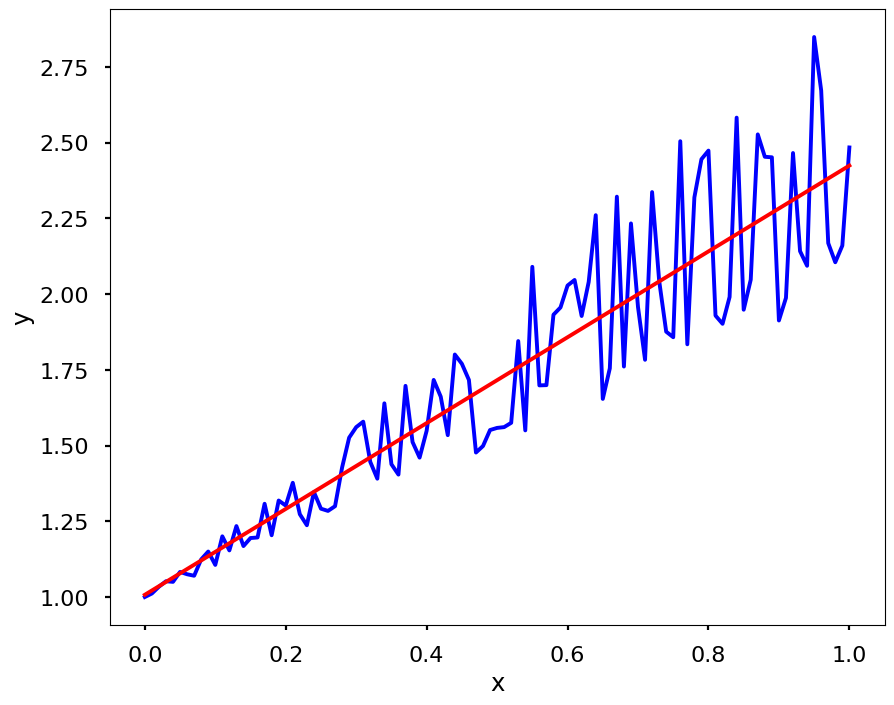

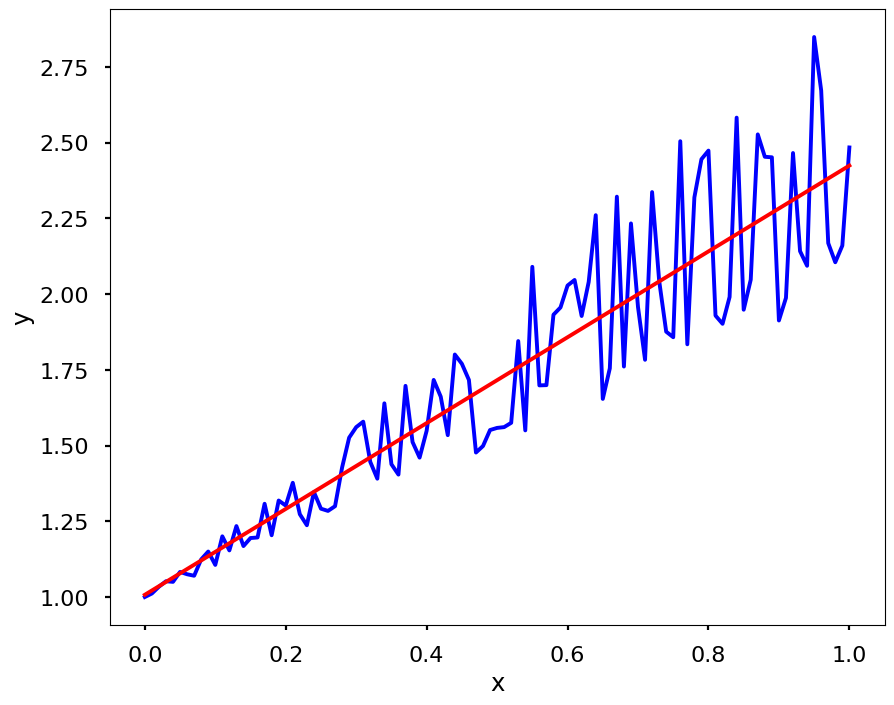

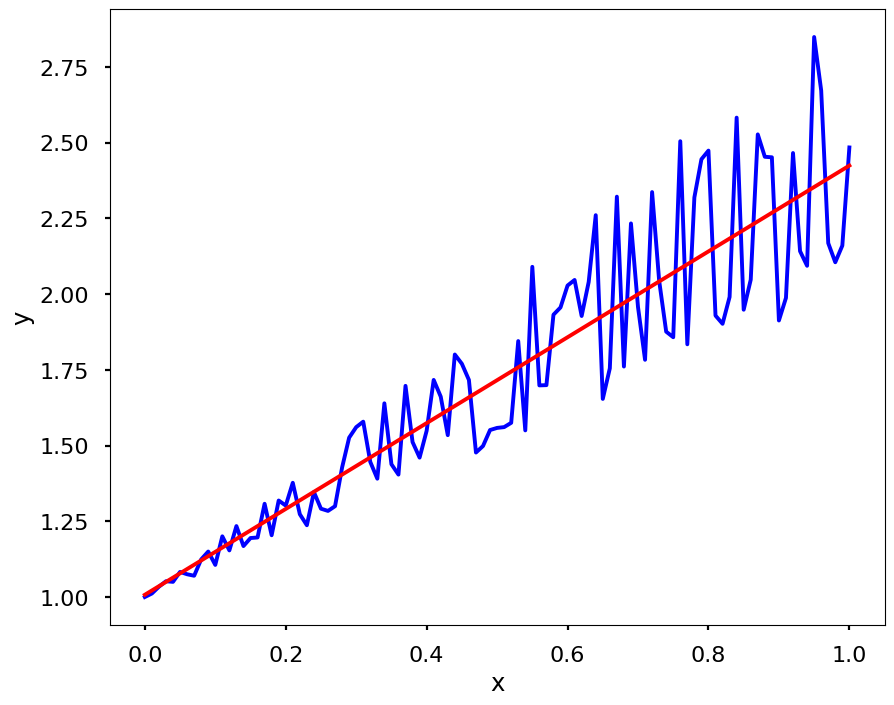

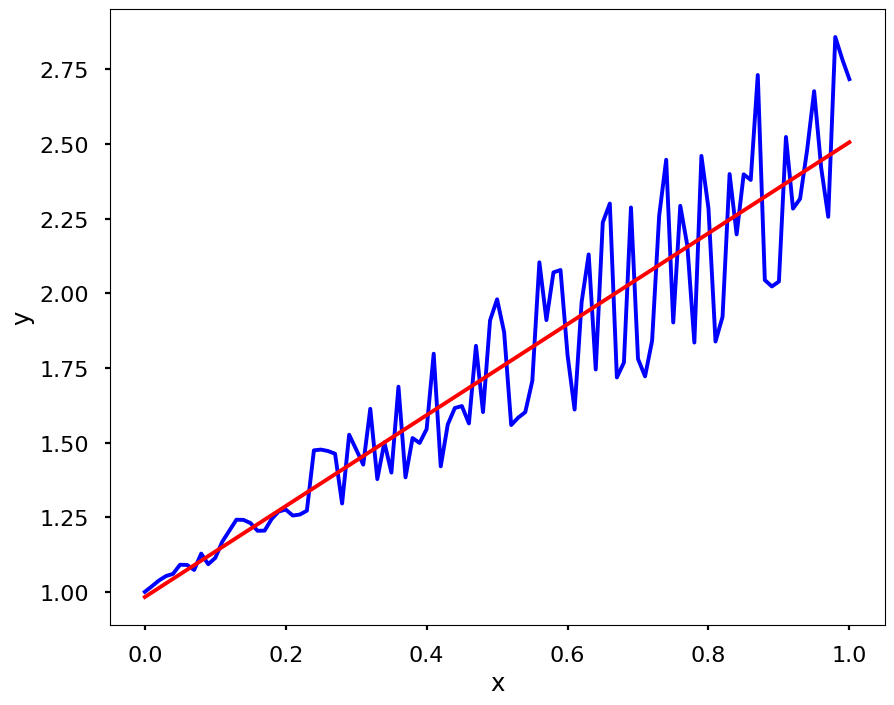

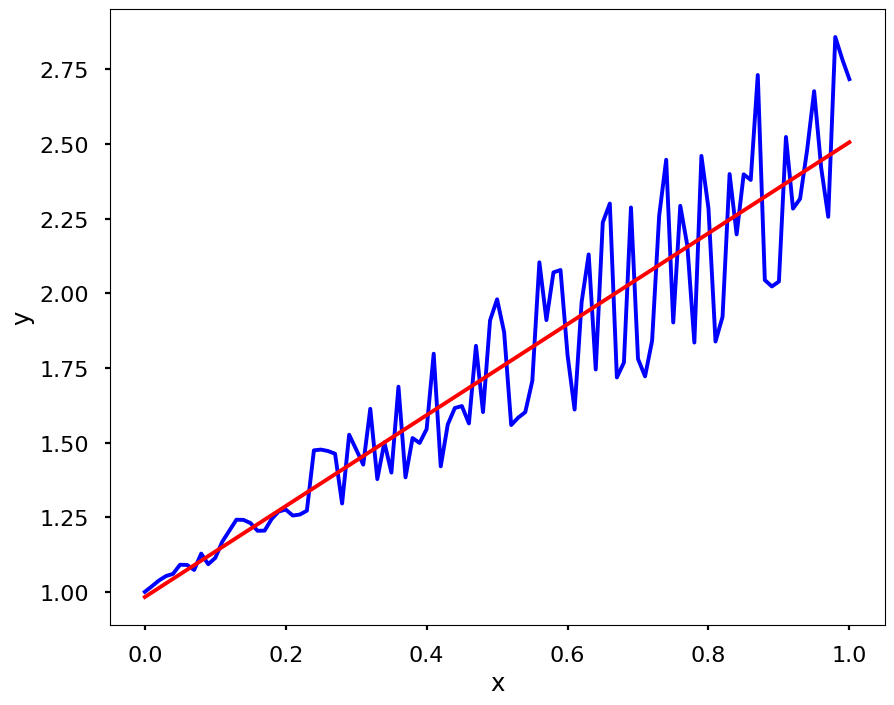

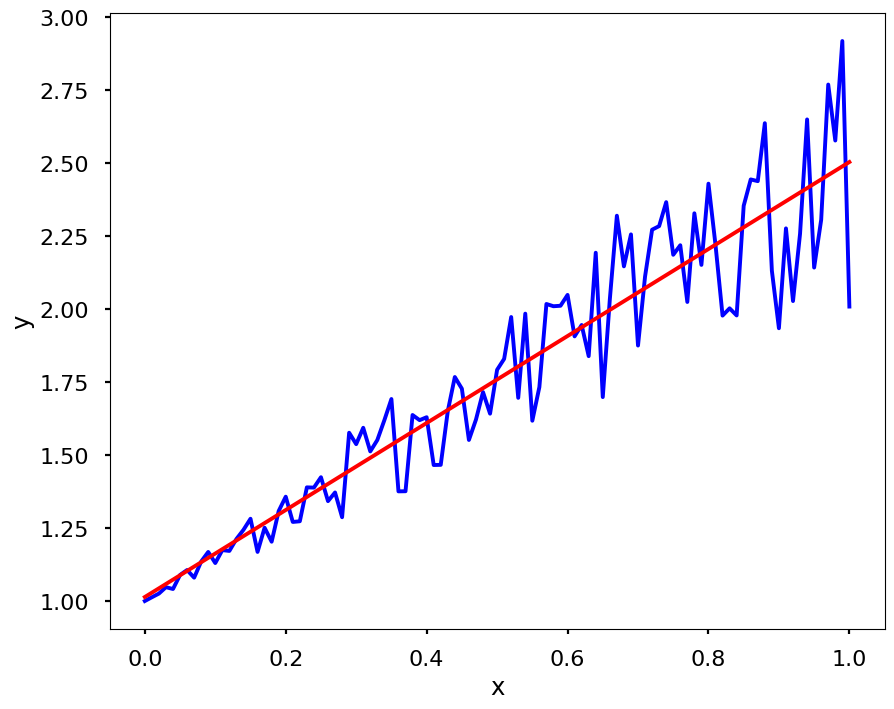

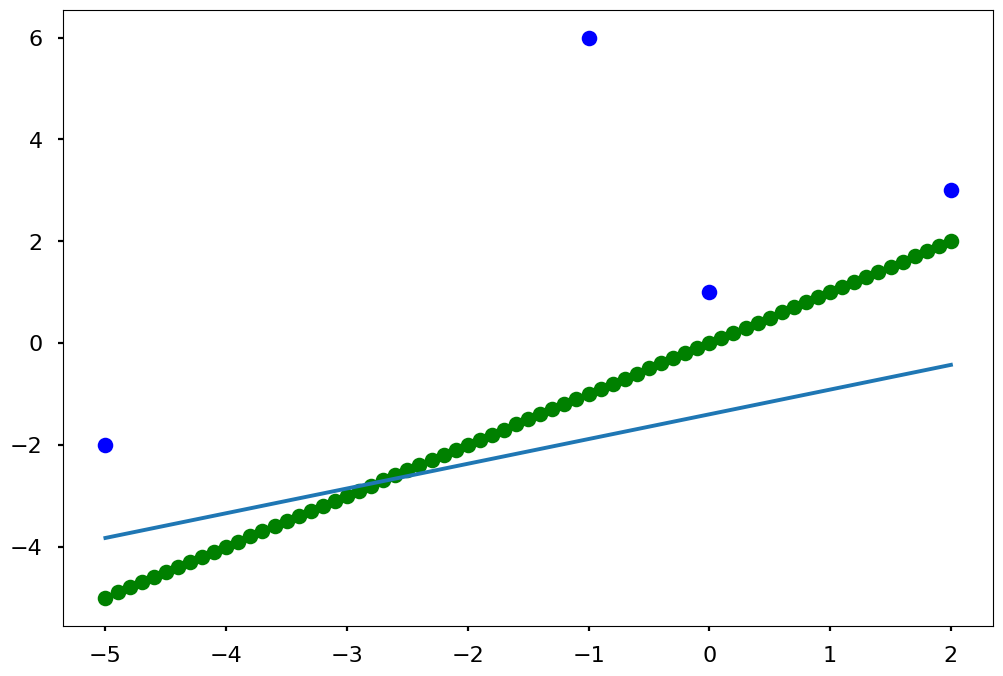

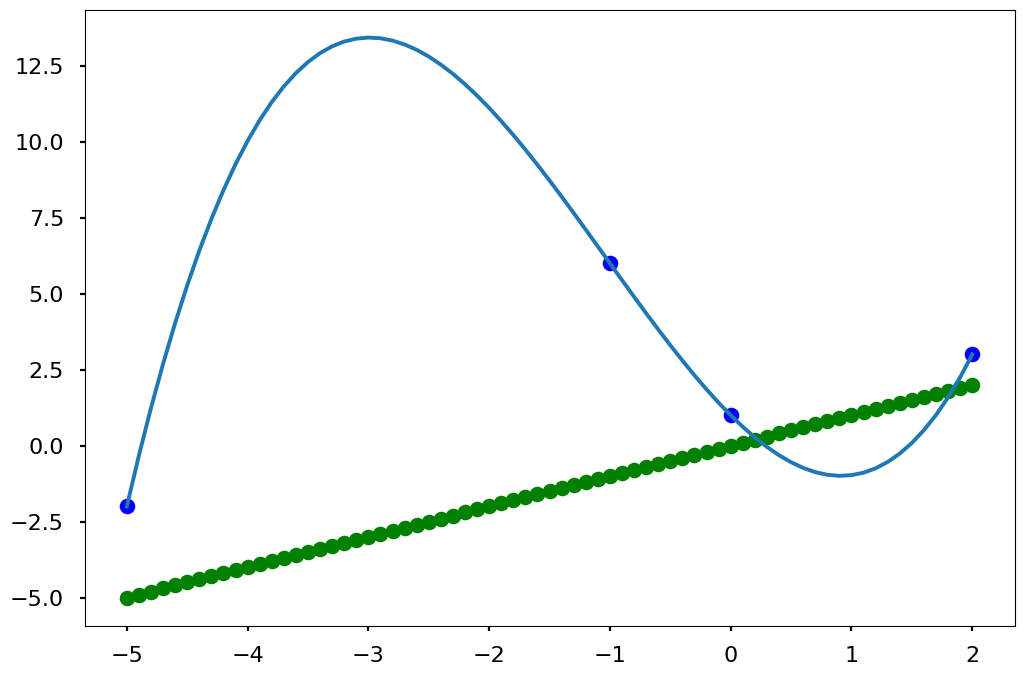

In [ ]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

# get the divided difference ceof
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y,'bo')
plt.plot(x_new, x_new, 'go')
plt.plot(x_new, y_new)

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

#generate x dan y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

#assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

#turn y into a colom vector
y = y[:, np.newaxis]

#direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

<ipython-input-50-ac6b86530511>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


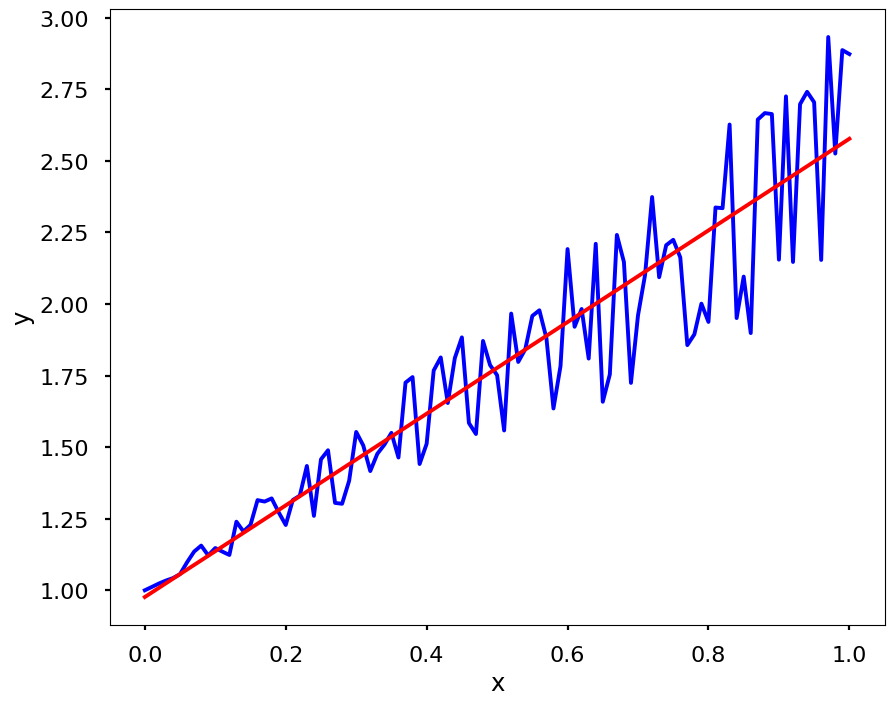

In [ ]:
#plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.60073902]
 [0.97640631]]


In [ ]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.60073902]
 [0.97640631]]


[1.41294096 1.01870412]


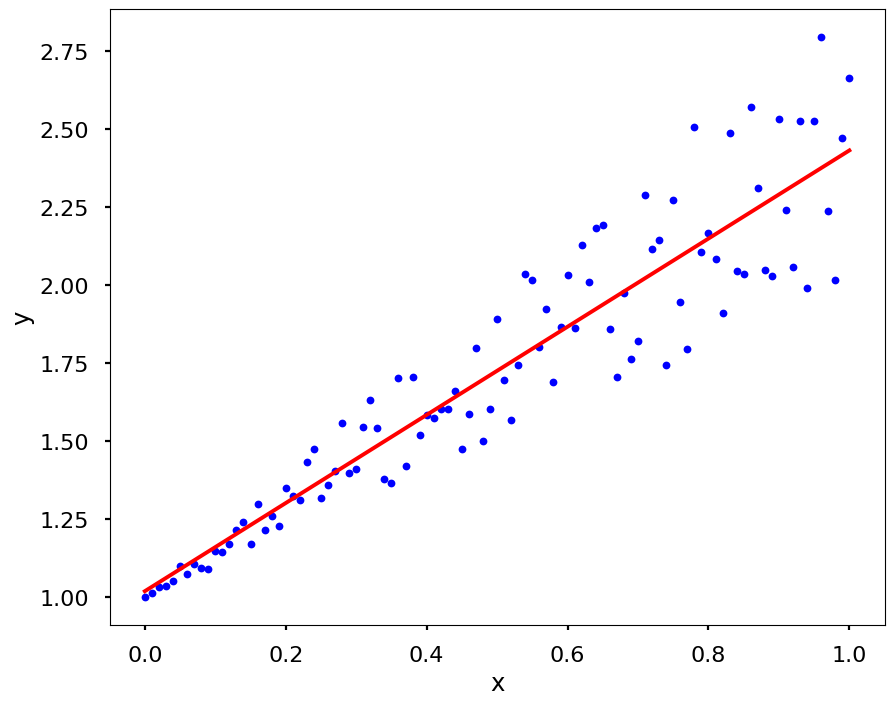

In [ ]:
#generate x dan y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
  y = a * x + b
  return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

#plot the result
plt.figure(figsize =  (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0] * x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()